<a href="https://colab.research.google.com/github/dsatrier/precog/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Model Used

I used a YOLOv8 model and trained it on the COCO dataset for performing object detection on the hateful memes dataset.

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 15.5 MB/s eta 0:00:00


In [8]:
import locale
locale.getpreferredencoding = lambda: "UTF-8" #had an issue with encoding

In [12]:
!pip install opendatasets
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/parthplc/facebook-hateful-meme-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aadid04
Your Kaggle Key: ··········


100%|██████████| 3.35G/3.35G [02:55<00:00, 20.5MB/s]


In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 249MB/s]


In [6]:
results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 433k/433k [00:00<00:00, 47.9MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 3611.17file/s]

Dataset download success ✅ (2.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 110MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 284.25it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 7486.49it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.78G     0.9308      3.155      1.291         32        640: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all          4         17      0.858       0.54      0.727       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.793G      1.162      3.127      1.518         33        640: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all          4         17      0.904      0.526      0.734      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.782G      0.925      2.507      1.254         17        640: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          4         17      0.906      0.532      0.741      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.782G      1.131      2.586      1.403         27        640: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all          4         17      0.609      0.714      0.783      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      0.82G      1.293      2.959      1.641         25        640: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]

                   all          4         17      0.611      0.717      0.778      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.82G      1.183      2.878      1.472         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]

                   all          4         17      0.618      0.725      0.749      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      0.82G      1.224      3.258       1.58         31        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.50it/s]

                   all          4         17      0.909       0.55       0.75      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      0.82G      1.333       2.35      1.586         29        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.11it/s]

                   all          4         17      0.915       0.55       0.75      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.816G      1.125      3.881      1.704         14        640: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          4         17       0.92       0.55       0.75      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.82G     0.8626      2.278       1.33         30        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.25it/s]

                   all          4         17      0.925       0.55      0.751      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      0.82G     0.8773      2.015      1.254         21        640: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all          4         17      0.923       0.55      0.837      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.818G      1.173      1.984      1.356         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.73it/s]

                   all          4         17      0.926       0.55      0.834      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      0.82G      1.236      2.902      1.596         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all          4         17      0.942      0.535      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.818G      1.298      2.124      1.569         18        640: 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all          4         17      0.944      0.536      0.661      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.82G      1.071      2.793      1.417         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all          4         17      0.934       0.55      0.661      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.82G      1.031      1.686      1.367         31        640: 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          4         17      0.895       0.55      0.661      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      0.82G     0.8749      1.674      1.297         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.88it/s]

                   all          4         17      0.872       0.55      0.661      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      0.82G      1.069      2.518      1.356         39        640: 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]


                   all          4         17      0.872       0.55      0.661      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      0.82G      1.005      2.312      1.419         29        640: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]

                   all          4         17      0.813      0.554      0.634      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      0.82G      0.993      2.409      1.473         24        640: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]

                   all          4         17      0.813      0.554      0.634      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      0.82G     0.8296      1.687      1.308         20        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.00it/s]

                   all          4         17      0.792      0.561      0.632      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      0.82G     0.9675      1.818      1.395         22        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.36it/s]

                   all          4         17      0.792      0.561      0.632      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.822G     0.9514      2.097      1.265         41        640: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          4         17      0.762      0.583      0.632      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      0.82G      1.095      1.825      1.445         37        640: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.42it/s]

                   all          4         17      0.762      0.583      0.632      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      0.82G      1.069      1.435      1.351         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.09it/s]

                   all          4         17      0.725      0.583      0.631      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      0.82G     0.9423      1.801      1.376         20        640: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.14it/s]

                   all          4         17      0.725      0.583      0.631      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.822G     0.9536       1.86      1.311         37        640: 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.30it/s]

                   all          4         17       0.94      0.383       0.62      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      0.82G      0.805      1.698      1.212         34        640: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         17       0.94      0.383       0.62      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      0.82G       1.08      1.699      1.423         35        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all          4         17      0.943      0.383      0.613      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      0.82G     0.7429      2.063      1.218         26        640: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all          4         17      0.943      0.383      0.613      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.82G      0.895       1.43        1.4         20        640: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]

                   all          4         17      0.942      0.375      0.602      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.816G      1.152       2.28      1.396         15        640: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.01it/s]

                   all          4         17      0.942      0.375      0.602      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      0.82G     0.7457      1.332      1.154         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.13it/s]

                   all          4         17       0.94      0.375      0.578      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.82G     0.8135      1.697      1.274         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          4         17       0.94      0.375      0.578      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      0.82G     0.6167       1.44      1.089         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all          4         17      0.939      0.375      0.578      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      0.82G     0.7441      1.123      1.101         33        640: 100%|██████████| 1/1 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all          4         17      0.939      0.375      0.578      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.818G      1.068      1.791      1.575         15        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.95it/s]

                   all          4         17      0.935      0.374      0.576      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      0.82G     0.8777      1.086      1.215         26        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.58it/s]

                   all          4         17      0.935      0.374      0.576      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.814G     0.5675      1.173      1.105         12        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.77it/s]

                   all          4         17      0.931      0.374      0.578      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.818G     0.6878      0.863      1.087         30        640: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.72it/s]

                   all          4         17      0.931      0.374      0.578      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      0.82G     0.9914      1.683      1.407         31        640: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.73it/s]

                   all          4         17      0.764      0.373      0.577      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      0.82G     0.5834     0.7123     0.9234         27        640: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.14it/s]

                   all          4         17      0.764      0.373      0.577      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      0.82G     0.8912      1.159       1.23         35        640: 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          4         17      0.764      0.374      0.495      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      0.82G      0.794      1.287      1.176         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]

                   all          4         17      0.764      0.374      0.495      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      0.82G     0.8126     0.9474       1.24         39        640: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.21it/s]

                   all          4         17      0.767      0.373      0.494      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.816G     0.7662      1.092      1.169         18        640: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.59it/s]

                   all          4         17      0.767      0.373      0.494      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      0.82G     0.7026     0.8885      1.195         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.83it/s]

                   all          4         17       0.77      0.373      0.496      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      0.82G     0.8677      1.564      1.301         19        640: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all          4         17       0.77      0.373      0.496      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      0.82G     0.8949       1.14      1.324         29        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]

                   all          4         17      0.768      0.373      0.497      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      0.82G     0.7853      1.326      1.256         24        640: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all          4         17      0.768      0.373      0.497      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.822G     0.8446     0.9784      1.167         41        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          4         17      0.769      0.373      0.497      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.816G      1.073      1.813      1.506         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all          4         17      0.769      0.373      0.497      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.818G     0.9789     0.9341      1.206         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]

                   all          4         17      0.769      0.373      0.497      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      0.82G     0.8291      1.492      1.259         31        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          4         17      0.944      0.373      0.472      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.818G     0.5788      1.515       1.04         24        640: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          4         17      0.944      0.373      0.472      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.822G     0.7711      1.378      1.192         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         17      0.944      0.373      0.472      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.816G     0.6254      1.025      1.094         18        640: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all          4         17      0.945      0.375      0.449      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.816G     0.8839      1.145      1.377         23        640: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.15it/s]

                   all          4         17      0.945      0.375      0.449      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.816G     0.4829       1.21      1.157         14        640: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]

                   all          4         17      0.945      0.375      0.449      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      0.82G     0.5725     0.9717       1.11         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          4         17      0.943      0.383      0.444      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      0.82G     0.9639      1.593      1.342         44        640: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.08it/s]

                   all          4         17      0.943      0.383      0.444      0.342
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



61 epochs completed in 0.013 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.75it/s]


                   all          4         17      0.922       0.55      0.837      0.554
                person          4         10      0.981        0.3      0.484      0.246
                   dog          4          1          1          0      0.995      0.436
                 horse          4          2      0.941          1      0.995      0.698
              elephant          4          2          1          0      0.559     0.0559
              umbrella          4          1      0.765          1      0.995      0.995
          potted plant          4          1      0.845          1      0.995      0.895
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [18]:
import json
import cv2

In [15]:
cd facebook-hateful-meme-dataset/

/content/facebook-hateful-meme-dataset


In [16]:
with open('data/train.jsonl', 'r') as f:
    json_lines = f.readlines()

In [26]:
cd data

/content/facebook-hateful-meme-dataset/data


In [27]:
freqs = {}
img_count = 0
for line in json_lines:

    img_count+=1
    print(img_count)
    # Parse JSON from the line
    data = json.loads(line)
    # Extract image path
    img_path = data["img"]
    print(img_path)

    # Load image using OpenCV
    img = cv2.imread(img_path)

    # Perform object detection using YOLOv8
    results = model.predict(source=img, save=True, save_txt=True)

    result = results[0]

    for i in range(0, len(result.boxes)):
      box =  result.boxes[i]
      label = result.names[box.cls[0].item()]

      if label in freqs:
          freqs[label] += 1
      else:
          freqs[label] = 1
    if img_count == 4000:
        break


Streaming output truncated to the last 5000 lines.
Results saved to runs/detect/train3286
1 label saved to runs/detect/train3286/labels
3287
img/07539.png

0: 640x448 1 person, 1 bottle, 20.5ms
Speed: 2.5ms preprocess, 20.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train3287
1 label saved to runs/detect/train3287/labels
3288
img/48925.png

0: 448x640 1 person, 19.6ms
Speed: 2.6ms preprocess, 19.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/train3288
1 label saved to runs/detect/train3288/labels
3289
img/51309.png

0: 512x640 3 persons, 19.3ms
Speed: 3.5ms preprocess, 19.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/train3289
1 label saved to runs/detect/train3289/labels
3290
img/94021.png

0: 448x640 31 hot dogs, 19.7ms
Speed: 2.6ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved t

TypeError: write() argument must be str, not dict

In [24]:
import shutil
shutil.rmtree(r'runs')

In [29]:
print(freqs)

{'person': 8584, 'tie': 636, 'cat': 94, 'dog': 269, 'frisbee': 17, 'remote': 41, 'baseball glove': 20, 'cow': 131, 'cell phone': 188, 'couch': 70, 'tv': 30, 'umbrella': 40, 'handbag': 80, 'bus': 18, 'car': 236, 'bird': 68, 'cake': 37, 'bowl': 103, 'bottle': 127, 'orange': 27, 'apple': 14, 'cup': 149, 'potted plant': 45, 'chair': 262, 'scissors': 19, 'airplane': 17, 'clock': 24, 'book': 29, 'suitcase': 27, 'pizza': 16, 'dining table': 73, 'spoon': 22, 'knife': 12, 'oven': 45, 'donut': 56, 'surfboard': 47, 'bed': 88, 'traffic light': 30, 'banana': 29, 'wine glass': 33, 'horse': 104, 'skateboard': 9, 'skis': 1, 'teddy bear': 21, 'kite': 16, 'laptop': 43, 'truck': 61, 'backpack': 61, 'hot dog': 49, 'sink': 14, 'toilet': 7, 'train': 13, 'bear': 10, 'motorcycle': 45, 'sports ball': 33, 'elephant': 8, 'sheep': 92, 'giraffe': 8, 'bicycle': 22, 'stop sign': 6, 'mouse': 4, 'microwave': 16, 'tennis racket': 9, 'refrigerator': 16, 'toothbrush': 13, 'vase': 12, 'baseball bat': 19, 'boat': 24, 'benc

Most common objects:
person: 8584 occurrences
tie: 636 occurrences
dog: 269 occurrences
chair: 262 occurrences
car: 236 occurrences
cell phone: 188 occurrences
cup: 149 occurrences
cow: 131 occurrences
bottle: 127 occurrences
horse: 104 occurrences


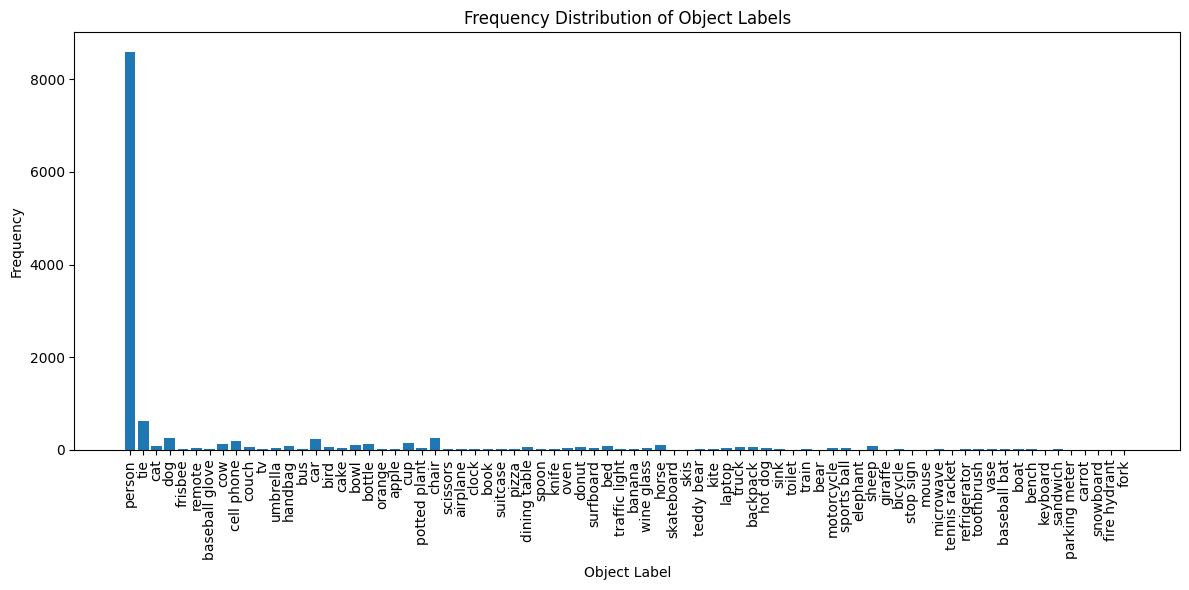

In [31]:
!pip install matplotlib
import matplotlib.pyplot as plt

total_occurrences = sum(freqs.values())

frequency = {label: count / total_occurrences for label, count in freqs.items()}

most_common_objects = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]

print("Most common objects:")
for label, count in most_common_objects:
    print(f"{label}: {count} occurrences")

plt.figure(figsize=(12, 6))

plt.bar(freqs.keys(), freqs.values())

plt.xticks(rotation=90)

plt.xlabel('Object Label')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Object Labels')

plt.tight_layout()
plt.show()